In [13]:
import os
import numpy as np
from keras import Sequential
from keras.layers import Conv3D, Dense, Flatten
from keras.losses import MSE
import keras.backend as K
import matplotlib.pyplot as plt

from create_examples import nb_neg_ex_per_pos
from discretization import make_cube, load_nparray, is_positive
from settings import resolution_cube, examples_data
from sklearn.model_selection import train_test_split

In [6]:
def get_cubes(nb_examples=128):
    examples_files = sorted(os.listdir(examples_data))[0:nb_examples]

    cubes = []
    ys = []
    for index, ex_file in enumerate(examples_files):
        file_name = os.path.join(examples_data, ex_file)
        example = load_nparray(file_name)

        cube = make_cube(example, resolution_cube)
        y = 1 * is_positive(ex_file)

        cubes.append(cube)
        ys.append(y)

    # Convertion to np.ndarrays with the first axes used for examples
    cubes = np.array(cubes)
    ys = np.array(ys)
    assert(ys.shape[0] == nb_examples)
    assert(cubes.shape[0] == nb_examples)

    return cubes, ys

In [7]:
# Configurations of the shape of data
channels = 2  # number of features
input_shape = (resolution_cube, resolution_cube, resolution_cube, channels)
data_format = "channels_last"

# Defining the model
model = Sequential()
# model.add(ZeroPadding3D()) # TODO : add this
model.add(Conv3D(
    kernel_size=3,
    input_shape=input_shape,
    filters=32,
    data_format=data_format
))
model.add(Flatten())
model.add(Dense(3 * resolution_cube))
model.add(Dense(2 * resolution_cube))
model.add(Dense(1 * resolution_cube))
model.add(Dense(1, activation='sigmoid'))
model.build()

def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

model.compile(optimizer='rmsprop', loss=MSE, metrics=['accuracy', mean_pred])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 28, 28, 28, 32)    1760      
_________________________________________________________________
flatten_1 (Flatten)          (None, 702464)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 90)                63221850  
_________________________________________________________________
dense_2 (Dense)              (None, 60)                5460      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 63,230,931
Trainable params: 63,230,931
Non-trainable params: 0
________________________________________________________________

In [24]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 28, 28, 28, 32)    1760      
_________________________________________________________________
flatten_1 (Flatten)          (None, 702464)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 90)                63221850  
_________________________________________________________________
dense_2 (Dense)              (None, 60)                5460      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 63,230,931
Trainable params: 63,230,931
Non-trainable params: 0
________________________________________________________________

In [8]:
# We are taking systems of the first 200 proteins (pos and neg example)
nb_examples = 200 * (1 + nb_neg_ex_per_pos)
cubes, ys = get_cubes(nb_examples)
print("Done loading dataset")
cubes_train, cubes_test, ys_train, ys_test = train_test_split(cubes, ys, test_size=0.33, random_state=42)
print(cubes.shape[0] == cubes_train.shape[0] + cubes_test.shape[0])
print(ys.shape[0] == ys_train.shape[0] + ys_test.shape[0])
print("Done splitting in train and test sets")

history = model.fit(cubes_train, ys_train)

Done loading dataset


True
True
Done splitting in train and test sets
Epoch 1/1


  32/1474 [..............................] - ETA: 6:40 - loss: 0.2524 - acc: 0.5312 - mean_pred: 0.4933

  64/1474 [>.............................] - ETA: 5:49 - loss: 0.2043 - acc: 0.6875 - mean_pred: 0.2466

  96/1474 [>.............................] - ETA: 5:16 - loss: 0.1675 - acc: 0.7604 - mean_pred: 0.1644

 128/1474 [=>............................] - ETA: 4:56 - loss: 0.1490 - acc: 0.7969 - mean_pred: 0.1233

 160/1474 [==>...........................] - ETA: 4:42 - loss: 0.1255 - acc: 0.8313 - mean_pred: 0.0987

 192/1474 [==>...........................] - ETA: 4:33 - loss: 0.1150 - acc: 0.8490 - mean_pred: 0.0822

 224/1474 [===>..........................] - ETA: 4:22 - loss: 0.1209 - acc: 0.8482 - mean_pred: 0.0705

 256/1474 [====>.........................] - ETA: 4:13 - loss: 0.1136 - acc: 0.8594 - mean_pred: 0.0617

 288/1474 [====>.........................] - ETA: 4:05 - loss: 0.1044 - acc: 0.8715 - mean_pred: 0.0548

 320/1474 [=====>........................] - ETA: 3:57 - loss: 0.1096 - acc: 0.8688 - mean_pred: 0.0493

 352/1474 [======>.......................] - ETA: 3:49 - loss: 0.1110 - acc: 0.8693 - mean_pred: 0.0448

 384/1474 [======>.......................] - ETA: 3:45 - loss: 0.1044 - acc: 0.8776 - mean_pred: 0.0411

 416/1474 [=======>......................] - ETA: 3:40 - loss: 0.1011 - acc: 0.8822 - mean_pred: 0.0379

 448/1474 [========>.....................] - ETA: 3:35 - loss: 0.1006 - acc: 0.8839 - mean_pred: 0.0352

 480/1474 [========>.....................] - ETA: 3:28 - loss: 0.1043 - acc: 0.8812 - mean_pred: 0.0329

 512/1474 [=========>....................] - ETA: 3:20 - loss: 0.1017 - acc: 0.8848 - mean_pred: 0.0308

 544/1474 [==========>...................] - ETA: 3:13 - loss: 0.1068 - acc: 0.8805 - mean_pred: 0.0290

 576/1474 [==========>...................] - ETA: 3:05 - loss: 0.1026 - acc: 0.8854 - mean_pred: 0.0274

 608/1474 [===========>..................] - ETA: 2:58 - loss: 0.1005 - acc: 0.8882 - mean_pred: 0.0260

 640/1474 [============>.................] - ETA: 2:51 - loss: 0.0954 - acc: 0.8938 - mean_pred: 0.0247

 672/1474 [============>.................] - ETA: 2:44 - loss: 0.0983 - acc: 0.8914 - mean_pred: 0.0235

 704/1474 [=============>................] - ETA: 2:37 - loss: 0.0981 - acc: 0.8920 - mean_pred: 0.0224

 736/1474 [=============>................] - ETA: 2:30 - loss: 0.0993 - acc: 0.8913 - mean_pred: 0.0214

 768/1474 [==============>...............] - ETA: 2:23 - loss: 0.0978 - acc: 0.8932 - mean_pred: 0.0206

 800/1474 [===============>..............] - ETA: 2:16 - loss: 0.0951 - acc: 0.8962 - mean_pred: 0.0197

 832/1474 [===============>..............] - ETA: 2:10 - loss: 0.0950 - acc: 0.8966 - mean_pred: 0.0190

 864/1474 [================>.............] - ETA: 2:03 - loss: 0.0927 - acc: 0.8993 - mean_pred: 0.0183

 896/1474 [=================>............] - ETA: 1:56 - loss: 0.0905 - acc: 0.9018 - mean_pred: 0.0176

 928/1474 [=================>............] - ETA: 1:50 - loss: 0.0906 - acc: 0.9019 - mean_pred: 0.0170

 960/1474 [==================>...........] - ETA: 1:43 - loss: 0.0907 - acc: 0.9021 - mean_pred: 0.0164

 992/1474 [===================>..........] - ETA: 1:37 - loss: 0.0918 - acc: 0.9012 - mean_pred: 0.0159

1024/1474 [===================>..........] - ETA: 1:30 - loss: 0.0928 - acc: 0.9004 - mean_pred: 0.0154

1056/1474 [====================>.........] - ETA: 1:24 - loss: 0.0910 - acc: 0.9025 - mean_pred: 0.0149

1088/1474 [=====================>........] - ETA: 1:17 - loss: 0.0920 - acc: 0.9017 - mean_pred: 0.0145

1120/1474 [=====================>........] - ETA: 1:11 - loss: 0.0929 - acc: 0.9009 - mean_pred: 0.0141

1152/1474 [======================>.......] - ETA: 1:05 - loss: 0.0929 - acc: 0.9010 - mean_pred: 0.0137

1184/1474 [=======================>......] - ETA: 58s - loss: 0.0930 - acc: 0.9012 - mean_pred: 0.0133 

1216/1474 [=======================>......] - ETA: 52s - loss: 0.0930 - acc: 0.9013 - mean_pred: 0.0130

1248/1474 [========================>.....] - ETA: 45s - loss: 0.0922 - acc: 0.9022 - mean_pred: 0.0126

1280/1474 [=========================>....] - ETA: 39s - loss: 0.0915 - acc: 0.9031 - mean_pred: 0.0123

1312/1474 [=========================>....] - ETA: 32s - loss: 0.0915 - acc: 0.9032 - mean_pred: 0.0120

1344/1474 [==========================>...] - ETA: 26s - loss: 0.0923 - acc: 0.9025 - mean_pred: 0.0117

1376/1474 [===========================>..] - ETA: 19s - loss: 0.0931 - acc: 0.9019 - mean_pred: 0.0115

1408/1474 [===========================>..] - ETA: 13s - loss: 0.0924 - acc: 0.9027 - mean_pred: 0.0112

1440/1474 [============================>.] - ETA: 6s - loss: 0.0903 - acc: 0.9049 - mean_pred: 0.0110 

1472/1474 [============================>.] - ETA: 0s - loss: 0.0924 - acc: 0.9029 - mean_pred: 0.0107

1474/1474 [==============================] - 297s 202ms/step - loss: 0.0923 - acc: 0.9030 - mean_pred: 0.0107


In [17]:
print(history.history.keys())
history.history['loss']

dict_keys(['loss', 'acc', 'mean_pred'])


[0.09231711275056712]

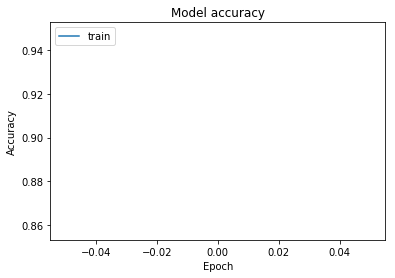

In [19]:
# Summarize history for Accuracy
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
y_pred = model.predict(cubes_test, verbose=True)

 32/726 [>.............................] - ETA: 25s

 64/726 [=>............................] - ETA: 22s

 96/726 [==>...........................] - ETA: 20s

128/726 [====>.........................] - ETA: 18s

160/726 [=====>........................] - ETA: 16s

192/726 [======>.......................] - ETA: 15s

224/726 [========>.....................] - ETA: 14s

256/726 [=========>....................] - ETA: 13s

288/726 [==========>...................] - ETA: 12s

320/726 [============>.................] - ETA: 11s

352/726 [=============>................] - ETA: 10s

384/726 [==============>...............] - ETA: 9s 

416/726 [================>.............] - ETA: 8s

448/726 [=================>............] - ETA: 7s

480/726 [==================>...........] - ETA: 6s

512/726 [====================>.........] - ETA: 5s

544/726 [=====================>........] - ETA: 4s

576/726 [======================>.......] - ETA: 4s

608/726 [========================>.....] - ETA: 3s

640/726 [=========================>....] - ETA: 2s

672/726 [==========================>...] - ETA: 1s

704/726 [============================>.] - ETA: 0s

726/726 [==============================] - 20s 27ms/step


In [27]:
np.mean(y_pred == ys_test)

0.8777064408168841

In [31]:
np.sum(y_pred)

5.9265147e-08